### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [25]:
df = pd.read_csv("data/ready_for_plotting/data_plot_map.csv")
df.Date = pd.to_datetime(df.Date)

In [26]:
df[df.Fatalities_Total > 100][:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy
38,1950,1953-06-18,1634,"Tachikawa AFB, Tokyo, Japan",Military - U.S. Air Force,NaN,Tachikawa AB - Kimpo AB,Douglas C-124A Globemaster II,51-137A,43471,"{'total': 129, 'passengers': 122, 'crew': 7}","{'total': 129, 'passengers': 122, 'crew': 7}",0.0,Crashed shortly after taking off from Tachikaw...,129,129,Military,"{'place_id': 258971419, 'licence': 'Data © Ope...",JPN,Japan
199,1990,1990-10-02,0915,"Guangzhou, China",China Southern Airlines / Xiamen Airlines,?/8301,Guangzhou - Shanghi,Boeing B-737-247 / Boeing B-757-21B,B-2812/B-2510,24758/282 / 23189/1072,"{'total': 226, 'passengers': 205, 'crew': 21}","{'total': 128, 'passengers': 121, 'crew': 7}",0.0,Shortly after taking off a hijacker entered th...,226,128,China Southern Airlines / Xiamen Airlines,"{'place_id': 236617514, 'licence': 'Data © Ope...",CHN,"Guangdong Province, China"
249,1980,1984-10-11,05:40,"Near Omsk, Russia",Aeroflot,3352,Krasnodar - Omsk,Tupolev TU-154B,CCCP-85243,243,"{'total': 179, 'passengers': 170, 'crew': 9}","{'total': 174, 'passengers': 169, 'crew': 5}",4.0,"While landing, the crew noticed something on t...",179,174,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope...",RUS,Russia
258,1980,1984-12-23,1415,"Near Kranoyarsk, Russia",Aeroflot,3519,Krasnoyarsk - Irkutsk,Tupolev TU-154B-2,CCCP-85338,338,"{'total': 111, 'passengers': 104, 'crew': 7}","{'total': 110, 'passengers': 103, 'crew': 7}",0.0,The aircraft crashed while attempting an emerg...,111,110,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope...",RUS,Russia
271,1980,1985-02-19,0927,"Near Durango, Vizcaya, Spain",Iberia Airlines,610,Madrid - Bilbao,Boeing B-727-256,EC-DDU,21777/1487,"{'total': 148, 'passengers': 141, 'crew': 7}","{'total': 148, 'passengers': 141, 'crew': 7}",0.0,The aircraft crashed into an antenna on Mt. Oi...,148,148,Iberia Airlines,"{'place_id': 288220776, 'licence': 'Data © Ope...",ESP,Spain


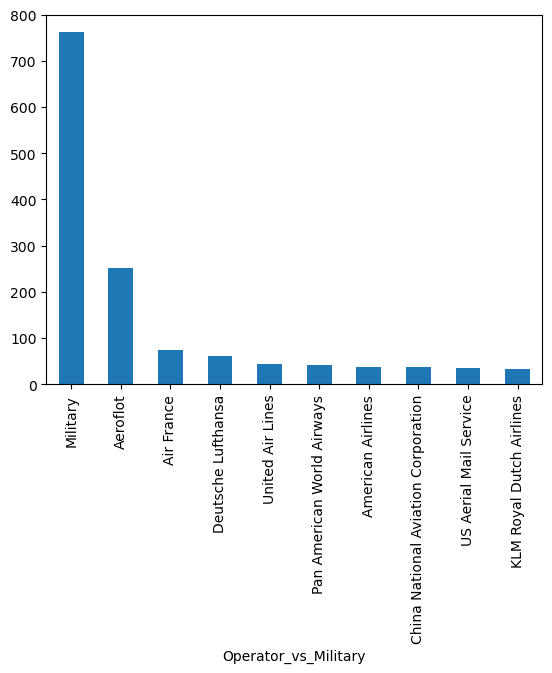

In [27]:
df.Operator_vs_Military.value_counts()[:10].plot(kind="bar")
pass

In [28]:
df3 = df[df.Operator_vs_Military.apply(lambda x : x in df.Operator_vs_Military.value_counts()[:5].index)]

In [29]:
df3[df3.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum()

Decade
1930     87
1940    201
1950    230
1960    186
1970     56
1980    124
1990     26
2000    109
Name: Fatalities_Total, dtype: int64

In [30]:
df

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom"
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States"
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States"
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,NaN,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot,"{'place_id': 224774650, 'licence': 'Data © Ope...",RUS,"Siberian Federal District, Russia"
5009,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,"{'total': 55, 'passengers': 50, 'crew': 5}","{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot,"{'place_id': 202588741, 'licence': 'Data © Ope...",UKR,"Kyiv, Ukraine"
5010,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,NaN,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,"{'total': 8, 'passengers': 3, 'crew': 5}","{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope...",RUS,Russia
5011,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,"{'total': 53, 'passengers': 44, 'crew': 9}","{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir,"{'place_id': 253308938, 'licence': 'Data © Ope...",THA,Thailand


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Decade                5013 non-null   int64         
 1   Date                  5013 non-null   datetime64[ns]
 2   Time                  3526 non-null   object        
 3   Location              5013 non-null   object        
 4   Operator              5002 non-null   object        
 5   Flight_Num            1339 non-null   object        
 6   Route                 4267 non-null   object        
 7   Ac_Type               5000 non-null   object        
 8   Registration          4750 non-null   object        
 9   Cn_Ln                 4361 non-null   object        
 10  Aboard                5013 non-null   object        
 11  Fatalities            5013 non-null   object        
 12  Ground                4982 non-null   float64       
 13  Summary           

In [32]:
df

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom"
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States"
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States"
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,NaN,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot,"{'place_id': 224774650, 'licence': 'Data © Ope...",RUS,"Siberian Federal District, Russia"
5009,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,"{'total': 55, 'passengers': 50, 'crew': 5}","{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot,"{'place_id': 202588741, 'licence': 'Data © Ope...",UKR,"Kyiv, Ukraine"
5010,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,NaN,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,"{'total': 8, 'passengers': 3, 'crew': 5}","{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope...",RUS,Russia
5011,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,"{'total': 53, 'passengers': 44, 'crew': 9}","{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir,"{'place_id': 253308938, 'licence': 'Data © Ope...",THA,Thailand


In [33]:
def to_plot_times_series(df):
    df_grouped =  df.groupby(df.Date.dt.to_period('M'))["Fatalities_Total"].sum()

    fig, ax = plt.subplots(figsize=(50, 5))
    # Plotting as time series
    df_grouped.plot(ax=ax,)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Fatalities')
    ax.set_title('Fatalities Over Time')

    # Adding vertical lines for January
    for date in df_grouped.index:
        if date.month == 1:  # Check if the month is January
            ax.axvline(x=date, color='r', linestyle='--', linewidth=2)

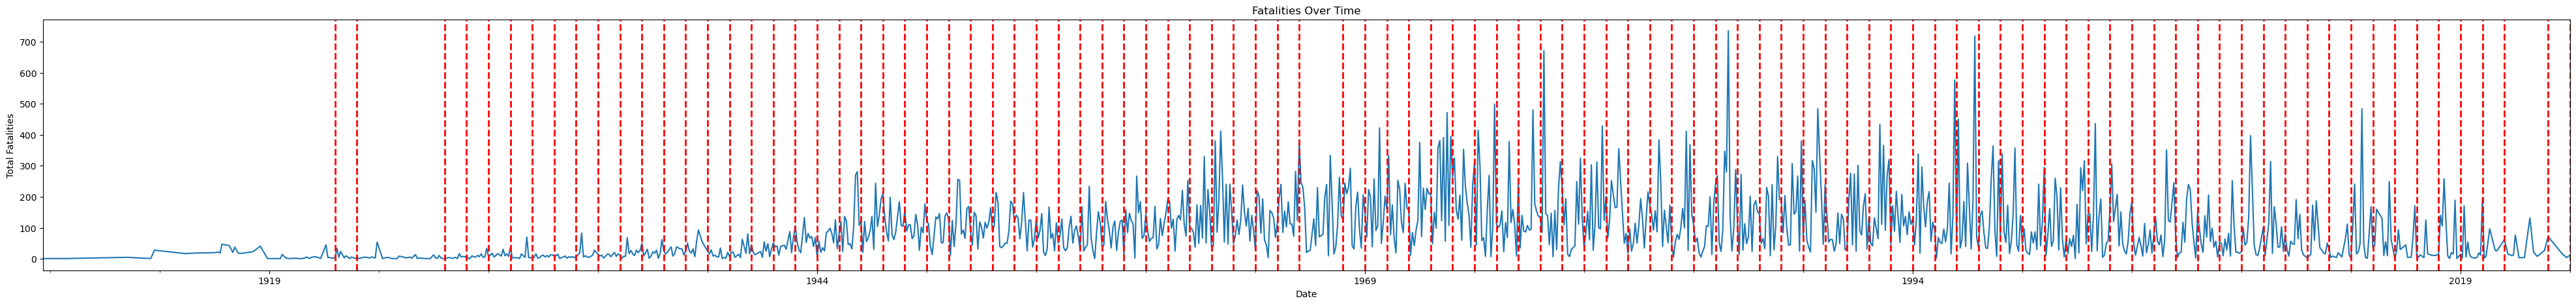

In [34]:
to_plot_times_series(df)

In [38]:
df

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom"
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States"
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States"
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,NaN,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot,"{'place_id': 224774650, 'licence': 'Data © Ope...",RUS,"Siberian Federal District, Russia"
5009,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,"{'total': 55, 'passengers': 50, 'crew': 5}","{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot,"{'place_id': 202588741, 'licence': 'Data © Ope...",UKR,"Kyiv, Ukraine"
5010,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,NaN,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,"{'total': 8, 'passengers': 3, 'crew': 5}","{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope...",RUS,Russia
5011,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,"{'total': 53, 'passengers': 44, 'crew': 9}","{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir,"{'place_id': 253308938, 'licence': 'Data © Ope...",THA,Thailand


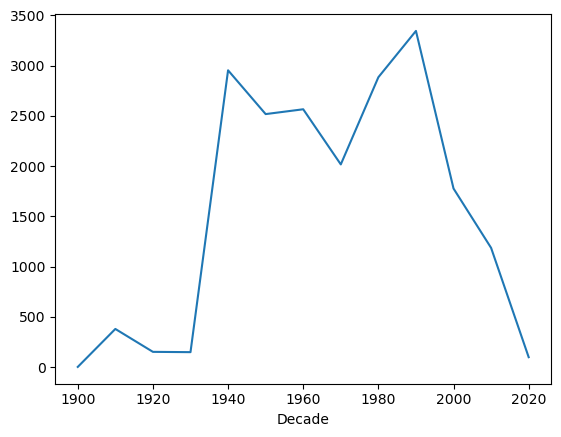

In [ ]:
df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
pass

In [ ]:
df[(df.Operator_vs_Military == 'Military') & (df.Decade > 2000) & (df.Decade < 2020)][:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy,Month_Year
2566,2010,2019-06-03,1300,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,...,"{'total': 13, 'passengers': 5, 'crew': 8}",0.0,Crashed about 34km WNW of Mechuka.,13,13,Military,"{'place_id': 246884012, 'licence': 'Data © Ope...",IND,India,Jun 2019
2567,2010,2019-07-30,200,"Rawalpindi, India",Military - Pakistan Army,NaN,Training,Beechcraft B300 King Air,766,B766,...,"{'total': 5, 'passengers': 0, 'crew': 5}",14.0,"The Pakistani military plane, on a training fl...",5,5,Military,"{'place_id': 243213483, 'licence': 'Data © Ope...",IND,"Punjab, India",Jul 2019
2576,2010,2018-03-06,1451,"Latakia, Syria",Military - Russian Air Force,NaN,Kuweires Air Base - Latakia-Khmeimim Air Base,Antonov An-26,RF-92955/52,10107,...,"{'total': 39, 'passengers': 33, 'crew': 6}",0.0,While on approach to Latakia-Khmeimim Air Base...,39,39,Military,"{'place_id': 217707803, 'licence': 'Data © Ope...",SYR,"Latakia Governorate, Syria",Mar 2018
2580,2010,2018-04-11,0800,"Boufarik AB, Algeria",Military - Algerian Air Force,NaN,Boufarik AB - Bechar - Tindouf,Ilyushin 76-TD,7T-WIP,1043419636,...,"{'total': 257, 'passengers': 247, 'crew': 10}",0.0,The Algerian military plane crashed soon after...,257,257,Military,"{'place_id': 77699763, 'licence': 'Data © Open...",DZA,"Blida, Algeria",Apr 2018
2582,2010,2018-05-02,1130,"Port Wentworth, Georgia",Military - US Air Force,NaN,Savannah - Tuscon,Lockheed HC-130H Hercules,65-0968,382-4110,...,"{'total': 9, 'passengers': 0, 'crew': 9}",0.0,A Porto Rico Air National Guard plane crashed ...,9,9,Military,"{'place_id': 665581, 'licence': 'Data © OpenSt...",USA,"Georgia, United States",May 2018


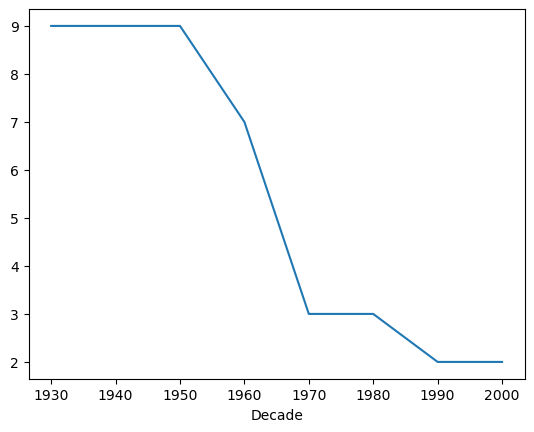

In [ ]:
df[df.Operator == 'United Air Lines'].groupby(["Decade"])["Aboard_Total"].count().plot(x="Decade", y="Fatalities_Total")
pass

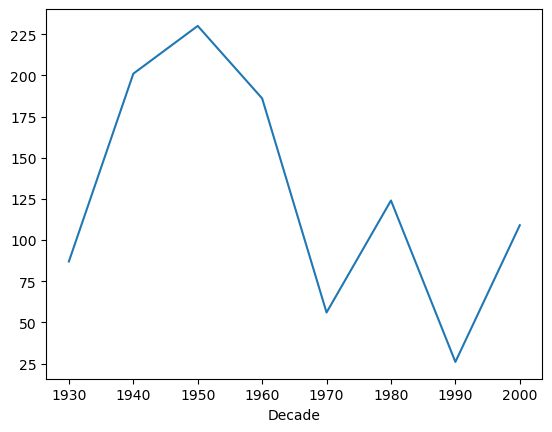

In [ ]:
df[df.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
pass

In [ ]:
# # Plot for Operator A
# plt.figure(figsize=(10, 6))
# plt.plot(specific_operator[‘Decade’], specific_operator[‘Total Crashes’], marker=‘o’, linestyle=‘-’, color=‘b’, label=‘Operator A’)
# # Add the line for Operator B
# plt.plot(specific_operator_B[‘Decade’], specific_operator_B[‘Total Crashes’], marker=‘x’, linestyle=‘-’, color=‘r’, label=‘Operator B’)
# # Adding details
# plt.title(‘Total Crashes by Decade for Operators A and B’)
# plt.xlabel(‘Decade’)
# plt.ylabel(‘Total Crashes’)
# plt.legend()  # This adds the legend to differentiate the lines
# plt.grid(True)
# plt.xticks(specific_operator[‘Decade’])  # Ensure all decades are shown; adjust if necessary
# plt.show()

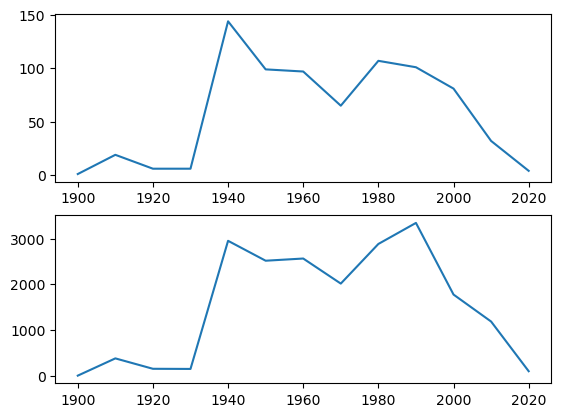

In [ ]:
fig, ax = plt.subplots(2,1)
ax[1].plot(df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Fatalities_Total"].sum())
ax[0].plot(df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Aboard_Total"].count())
pass


In [ ]:
def to_plot_chart(x):
    fig, ax = plt.subplots(2,1)
    ax[1].plot(df[df.Operator_vs_Military == x].groupby(["Decade"])["Fatalities_Total"].sum())
    ax[0].plot(df[df.Operator_vs_Military == x].groupby(["Decade"])["Aboard_Total"].count())

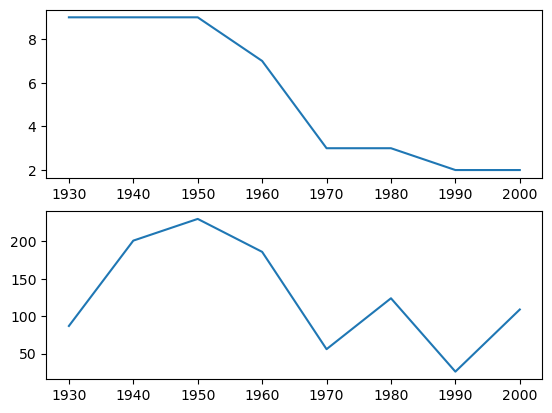

In [ ]:
to_plot_chart('United Air Lines')

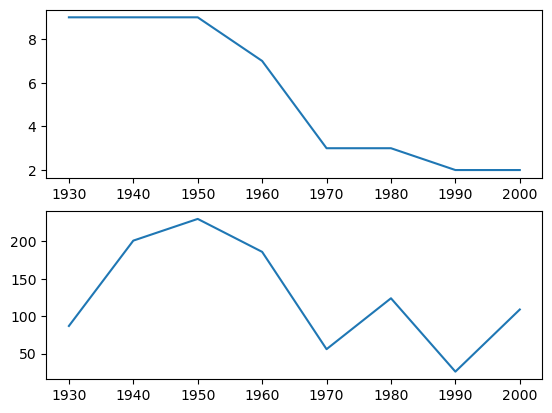

In [ ]:
to_plot_chart('United Air Lines')

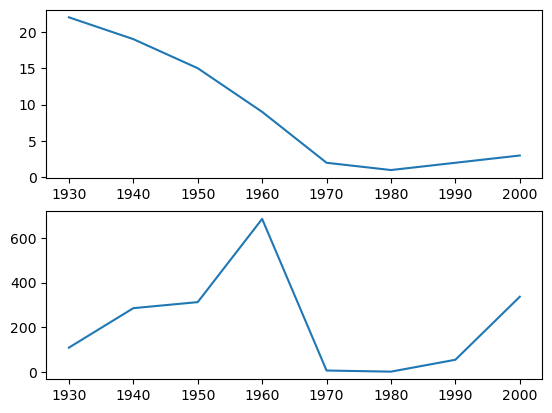

In [ ]:
to_plot_chart('Air France')

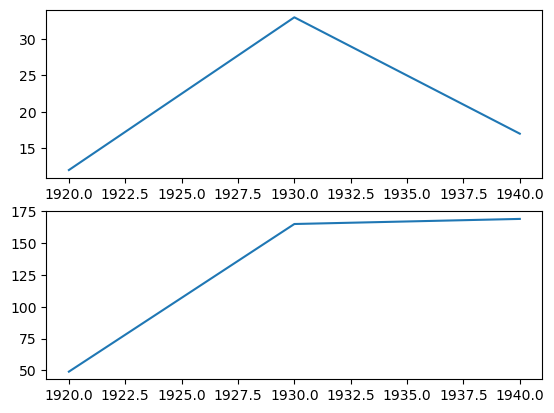

In [ ]:
to_plot_chart('Deutsche Lufthansa')

In [ ]:
df[(df.Operator == 'Deutsche Lufthansa')]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy,Month_Year
586,1940,1944-01-15,1345,"Belgrad, Yugoslavia",Deutsche Lufthansa,NaN,Thessaloniki - Belgrade,Junkers JU-52/3m,D-ADQW,640610,...,"{'total': 5, 'passengers': 3, 'crew': 2}",0.0,While approaching to land the aircraft was too...,5,5,Deutsche Lufthansa,"{'place_id': 86435550, 'licence': 'Data © Open...",SRB,"Central Serbia, Serbia",Jan 1944
590,1940,1944-02-21,1710,"Eubeoa, Greece",Deutsche Lufthansa,NaN,NaN,Junkers JU-52/3m,D-ABAS,6561,...,"{'total': 16, 'passengers': 13, 'crew': 3}",0.0,"After radioing they were returning , the plane...",16,16,Deutsche Lufthansa,"{'place_id': 80394471, 'licence': 'Data © Open...",GRC,Greece,Feb 1944
593,1940,1944-04-17,NaN,"Belgrad, Yugoslavia",Deutsche Lufthansa,NaN,Vienna - Belgrade - Sofia - Thessaloniki - Athens,Junkers JU-52/3m,D-AOCA,640996,...,"{'total': 5, 'passengers': 4, 'crew': 1}",0.0,Shot down by allied fighters.,7,5,Deutsche Lufthansa,"{'place_id': 86435550, 'licence': 'Data © Open...",SRB,"Central Serbia, Serbia",Apr 1944
594,1940,1944-04-21,NaN,"Frederikstad, Norway",Deutsche Lufthansa,NaN,Copenhagen - Oslo,Douglas DC-3,D-AAIG,2095,...,"{'total': 9, 'passengers': 6, 'crew': 3}",0.0,Crashed 50 miles from its destination after a...,20,9,Deutsche Lufthansa,"{'place_id': 175638009, 'licence': 'Data © Ope...",NOR,"Viken, Norway",Apr 1944
616,1940,1944-09-02,NaN,"Belgrad, Yugoslavia",Deutsche Lufthansa,NaN,Athens - Sofia - Belgrade - Vienna,Junkers JU52/3m,D-AUAW,641039,...,"{'total': 5, 'passengers': 2, 'crew': 3}",0.0,Shot down by allied fighters.,5,5,Deutsche Lufthansa,"{'place_id': 86435550, 'licence': 'Data © Open...",SRB,"Central Serbia, Serbia",Sep 1944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,1920,1928-09-06,NaN,"Heroldbach, Germany",Deutsche Lufthansa,NaN,NaN,Fokker FG III,D-180,1531,...,"{'total': 3, 'passengers': 2, 'crew': 1}",0.0,Crashed due to engine failure.,3,3,Deutsche Lufthansa,"{'place_id': 150810207, 'licence': 'Data © Ope...",DEU,Germany,Sep 1928
3239,1920,1928-12-11,NaN,"Letzlingen, Germany",Deutsche Lufthansa,NaN,Cologne - Berlin,Junkers G-31,D-1473,3005,...,"{'total': 3, 'passengers': 0, 'crew': 3}",0.0,"After a fuel line broke in flight, the pilot w...",4,3,Deutsche Lufthansa,"{'place_id': 158856880, 'licence': 'Data © Ope...",DEU,"Saxony-Anhalt, Germany",Dec 1928
3429,1920,1929-08-24,NaN,"Elm, Germany",Deutsche Lufthansa,NaN,Frankfurt - Berlin,Fokker FG II,D-757,1571,...,"{'total': 4, 'passengers': 3, 'crew': 1}",0.0,The aorcraft hit a hill in fog and poor visibi...,5,4,Deutsche Lufthansa,"{'place_id': 158768968, 'licence': 'Data © Ope...",DEU,"Lower Saxony, Germany",Aug 1929
3442,1920,1929-11-06,1010,"Near Godstone, Surrey, England",Deutsche Lufthansa,NaN,Croyden - Amsterdam - Berlin,Junkers G-24,D-903,911,...,"{'total': 7, 'passengers': 3, 'crew': 4}",0.0,After the plane's antenna wire struck the grou...,8,7,Deutsche Lufthansa,"{'place_id': 270463650, 'licence': 'Data © Ope...",GBR,"England, United Kingdom",Nov 1929


In [ ]:
df[(df.Operator == 'United Air Lines') & (df.Decade > 1990)]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy,Month_Year
2739,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,...,"{'total': 65, 'passengers': 56, 'crew': 9}",2750.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",Sep 2001
2740,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,...,"{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines,"{'place_id': 6167425, 'licence': 'Data © OpenS...",USA,"Pennsylvania, United States",Sep 2001


In [ ]:
df.Operator.value_counts()[:5]

Operator
Aeroflot                     251
Military - U.S. Air Force    141
Air France                    73
Deutsche Lufthansa            62
United Air Lines              44
Name: count, dtype: int64

For the two plains in 9/11 the ground was counted twice
- We split the count into two 2750 / 2 

In [ ]:
print(df.iloc[2759].Ground / 2)
df.loc[2758, "Ground"] = 1375
df.loc[2759, "Ground"] = 1375

0.0


Compare Data source with wiki to cross reference dates and fatalities 

In [ ]:
df[df.Date == "2001-09-11"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy,Month_Year
2737,2000,2001-09-11,0945,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,...,"{'total': 64, 'passengers': 58, 'crew': 6}",125.0,The aircraft was hijacked after taking off fro...,64,64,American Airlines,"{'place_id': 4249947, 'licence': 'Data © OpenS...",USA,"Virginia, United States",Sep 2001
2738,2000,2001-09-11,0847,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,...,"{'total': 92, 'passengers': 81, 'crew': 11}",2750.0,The aircraft was hijacked shortly after it lef...,92,92,American Airlines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",Sep 2001
2739,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,...,"{'total': 65, 'passengers': 56, 'crew': 9}",2750.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",Sep 2001
2740,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,...,"{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines,"{'place_id': 6167425, 'licence': 'Data © OpenS...",USA,"Pennsylvania, United States",Sep 2001


In [ ]:
df[df.Date == "1977-03-27"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location,Code,Country_Geopy,Month_Year
4616,1970,1977-03-27,1707,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,...,"{'total': 583, 'passengers': 560, 'crew': 23}",0.0,Both aircraft were diverted to Tenerife becaus...,644,583,Pan American World Airways / KLM,"{'place_id': 288818787, 'licence': 'Data © Ope...",ESP,"Canary Islands, Spain",Mar 1977


In [ ]:
df.Date.value_counts()[df.Date.value_counts() > 1]
# Good to know that we can have more than one crash in a single day

Date
2001-09-11    4
1988-08-31    4
1944-06-06    3
1945-02-23    3
1971-07-30    3
             ..
1968-12-26    2
1973-09-30    2
1984-10-11    2
1966-02-16    2
1988-10-19    2
Name: count, Length: 398, dtype: int64